# Assignment 2: Task 1

โดย

ตุลธร วงศ์ชัย รหัสนักศึกษา 63070224

ธนภัทร ธีรรัตตัญญู รหัสนักศึกษา 63070227

> **README**:
> - 'Run all' is not recommended. 
> - Section 1 must be run before any other section.
> - Read and follow instruction of each section carefully if it is provided.


# 1. Init Project

> **Instruction**: Set `ROOT_PATH` before running this section.

## 1.1 Import Libraries and Packages

In [1]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1.2 Set Root Path

* If you initialize this project for first time, run code cell R1
* Otherwise, set your own root path in code cell R2

In [2]:
# ### Code Cell R1 ###

# ROOT_PATH = os.getcwd() # Get current working directory

# # Create /data directory
# dir = os.path.join(ROOT_PATH, 'data')
# os.mkdir(dir)

# # Create /data/article_metadata directory
# dir = os.path.join(ROOT_PATH, 'data/article_metadata')
# os.mkdir(dir)

# # Create /data/datastore directory
# dir = os.path.join(ROOT_PATH, 'data/datastore')
# os.mkdir(dir)

# # Create /data/datastore/article_contents_by_month directory
# dir = os.path.join(ROOT_PATH, 'data/datastore/article_contents_by_month')
# os.mkdir(dir)

# # Create /data/datastore/article_titles_by_month directory
# dir = os.path.join(ROOT_PATH, 'data/datastore/article_titles_by_month')
# os.mkdir(dir)

# # Create /data/target directory
# dir = os.path.join(ROOT_PATH, 'data/target')
# os.mkdir(dir)

# # Create /data/target/article_categories_by_month directory
# dir = os.path.join(ROOT_PATH, 'data/target/article_categories_by_month')
# os.mkdir(dir)


In [3]:
### Code Cell R2 ###

# Set your own root path here
ROOT_PATH = os.getcwd()


# 2. Text Scraping from Web

Import libraries and packages used in this section

In [ ]:
import requests
from bs4 import BeautifulSoup


## 2.1 กำหนดค่าคงที่และสร้างฟังก์ชันที่ใช้งานบ่อย

2.1.1 กำหนดค่าคงที่ BASE_URL ของ News Article Archive ตามเซลล์โค้ดที่ 2.1.1

In [4]:
### Code Cell 2.1.1 ###

BASE_URL = 'http://www.it.kmitl.ac.th/~teerapong/news_archive/'


2.1.2 สร้างฟังก์ชันสำหรับส่ง GET request ไปยัง URL ที่ต้องการ พร้อมตรวจสอบว่าการส่งนั้นสำเร็จหรือไม่ (มี status เป็น 200) ถ้าไม่สำเร็จ ให้ทำการ raise Exception ตามเซลล์โค้ดที่ 2.1.2

In [5]:
### Code Cell 2.1.2 ###

def get_request(url: str, **kwargs) -> requests.models.Response:
    """
    Call GET request using requests package 
    then return response if it is successful (status 200)
    otherwise throw an exception.

    Parameters
    ----------
    url : str
      URL to request
    **kwargs
      Other parameters for requests.get

    Returns
    ----------
    requests.models.Response
      Response of the request
    """
    res = requests.get(url, **kwargs)

    # If the request is not successful, throw an exception.
    if (res.status_code != 200):
        print(res.text)
        err = Exception('The request is not successful. ' +
                        f'Its status code is {res.status_code}. ' +
                        f'The URL of request is {res.url}')
        raise err
    else:
        return res


## 2.2 เก็บ URL ของหน้ารวมบทความข่าวแต่ละเดือน

2.2.1 request หน้า index ของ News Article Archive และแปลงด้วย BeautifulSoup ตามเซลล์โค้ดที่ 2.2.1

In [6]:
### Code Cell 2.2.1 ###

index_url = BASE_URL + 'index.html'
res = get_request(index_url)
index_page = BeautifulSoup(res.content, 'lxml')  # Parse the response


2.2.2 เนื่องจากในหน้า index จะมีรายการของเดือนที่มีทั้งหมดอยู่ใน `<li>` ซึ่งเชื่อมไปยังหน้ารวมบทความข่าวของเดือนนั้น ๆ จึงทำการดึง `<li>` tag ตามเซลล์โค้ดที่ 2.2.2.1 จากนั้นทำการดึงค่าของ `href` ของ `<a>` ที่อยู่ในแต่ละ `<li>` tag ที่ได้มา ตามเซลล์โค้ดที่ 2.2.2.2

In [7]:
### Code Cell 2.2.2.1 ###

tags = index_page.select('li')
tags


[<li>Articles — <a href="month-jan-2017.html">January</a> [118]</li>,
 <li>Articles — <a href="month-feb-2017.html">February</a> [124]</li>,
 <li>Articles — <a href="month-mar-2017.html">March</a> [116]</li>,
 <li>Articles — <a href="month-apr-2017.html">April</a> [118]</li>,
 <li>Articles — <a href="month-may-2017.html">May</a> [115]</li>,
 <li>Articles — <a href="month-jun-2017.html">June</a> [115]</li>,
 <li>Articles — <a href="month-jul-2017.html">July</a> [122]</li>,
 <li>Articles — <a href="month-aug-2017.html">August</a> [116]</li>,
 <li>Articles — <a href="month-sep-2017.html">September</a> [113]</li>,
 <li>Articles — <a href="month-oct-2017.html">October</a> [124]</li>,
 <li>Articles — <a href="month-nov-2017.html">November</a> [122]</li>,
 <li>Articles — <a href="month-dec-2017.html">December</a> [115]</li>]

In [8]:
### Code Cell 2.2.2.2 ###

month_links = list()
for tag in tags:
    link = tag.find('a')['href']
    month_links.append(link)
    print(link)


month-jan-2017.html
month-feb-2017.html
month-mar-2017.html
month-apr-2017.html
month-may-2017.html
month-jun-2017.html
month-jul-2017.html
month-aug-2017.html
month-sep-2017.html
month-oct-2017.html
month-nov-2017.html
month-dec-2017.html


## 2.3 เก็บข้อมูล metadata ของบทความข่าวในแต่ละเดือน

2.3.1 สร้างฟังก์ชันสำหรับใช้สกัดเอาข้อมูลชื่อเรื่อง หมวดหมู่ และลิงก์ ของแต่ละบทความข่าวในหน้ารวมบทความในเดือนหนึ่ง โดยจะเก็บเฉพาะบทความที่ยังเข้าถึงได้ ตามเซลล์โค้ดที่ 2.3.1

In [16]:
### Code Cell 2.3.1 ###

def scrape_month_page(month_url: str):
    """
    Scrape title, category and link of available news articles from month page.

    Parameters
    ----------
    month_url : str
      URL of month page

    Returns
    ----------
    DataFrame
      DataFrame containing title, category and link of news articles
    """

    res = get_request(month_url)
    month_page = BeautifulSoup(res.content, 'lxml')  # Parse the response

    # Each article's title, category, and link are in tr tag,
    # so select all tr tag.
    articles = month_page.select('tbody>tr')

    article_titles = list()
    article_categories = list()
    article_links = list()

    for article in articles:

        # Category is in td tag with category class.
        category = article.select_one('td.category').string.strip()

        # Skip article if it is unavailable.
        if (category != 'N/A'):
            # Title is in a tag inside td tag with title class.
            title = article.select_one('td.title>a').string
            # Link to article page is href attribute of
            # a tag inside td tag with title class.
            link = article.select_one('td.title>a')['href']

            article_titles.append(title)
            article_categories.append(category)
            article_links.append(link)

    articles_df = pd.DataFrame({'title': article_titles,
                                'category': article_categories,
                                'link': article_links})
    return articles_df


2.3.2 เก็บข้อมูล metadata ของบทความ (หัวข้อ หมวดหมู่ และลิงก์) ในแต่ละเดือน โดยใช้ฟังก์ชันจากข้อ 2.3.1 และบันทึกเป็นไฟล์ csv แยกแต่ละเดือน ตามเซลล์โค้ดที่ 2.3.2

In [17]:
### Code Cell 2.3.2 ###

month_abbr_to_number = {
    'jan': '01',
    'feb': '02',
    'mar': '03',
    'apr': '04',
    'may': '05',
    'jun': '06',
    'jul': '07',
    'aug': '08',
    'sep': '09',
    'oct': '10',
    'nov': '11',
    'dec': '12'
}

for month_link in month_links:

    month_url = BASE_URL + month_link
    print(f'Scraping {month_url}')
    articles_df = scrape_month_page(month_url)
    print(f'Scraped {articles_df.shape[0]} article metadata')

    month = month_link[6:9]  # Get month abbriviation from month_link
    month = month_abbr_to_number[month]  # Convert to month number
    year = month_link[10:14]  # Get year from month_link
    file_name = f'article_metadata_{year}_{month}.csv'
    file_path = f'{ROOT_PATH}/data/article_metadata/{file_name}'
    articles_df.to_csv(file_path, index=False)
    print(f'Saved to ROOT_PATH/data/article_metadata/{file_name}')
    print('-'*10)


Scraping http://www.it.kmitl.ac.th/~teerapong/news_archive/month-jan-2017.html
Scraped 118 article metadata
Saved to ROOT_PATH/data/article_metadata/article_metadata_2017_01.csv
----------
Scraping http://www.it.kmitl.ac.th/~teerapong/news_archive/month-feb-2017.html
Scraped 122 article metadata
Saved to ROOT_PATH/data/article_metadata/article_metadata_2017_02.csv
----------
Scraping http://www.it.kmitl.ac.th/~teerapong/news_archive/month-mar-2017.html
Scraped 116 article metadata
Saved to ROOT_PATH/data/article_metadata/article_metadata_2017_03.csv
----------
Scraping http://www.it.kmitl.ac.th/~teerapong/news_archive/month-apr-2017.html
Scraped 117 article metadata
Saved to ROOT_PATH/data/article_metadata/article_metadata_2017_04.csv
----------
Scraping http://www.it.kmitl.ac.th/~teerapong/news_archive/month-may-2017.html
Scraped 114 article metadata
Saved to ROOT_PATH/data/article_metadata/article_metadata_2017_05.csv
----------
Scraping http://www.it.kmitl.ac.th/~teerapong/news_arch

## 2.4 เก็บข้อมูลเนื้อความจากหน้าบทความข่าว

2.4.1 สร้างฟังก์ชันสำหรับใช้สกัดเอาข้อมูลเนื้อความจากหน้าบทความข่าว ตามเซลล์โค้ดที่ 2.4.1

In [12]:
### Code Cell 2.4.1 ###

def scrape_article_page(article_url: str):
    """
    Scrape article content from news article page with a given URL.

    Parameters
    ----------
    article_url : str
      URL of article page

    Returns
    ----------
    str
      Article content
    """

    res = get_request(article_url)
    article_page = BeautifulSoup(res.content, 'lxml')  # Parse the response

    # Get content of article, which is in p tags without 'notice' class
    # in div.main
    p_tags = article_page.select('div.main>p:not(.notice)')

    # Every article repeats its title in content section.
    # Due to inconsistent formating style, some articles repeat in b tag
    # while some repeat in p tag. In the later case, remove first item of
    # selected p_tags.
    b_tags = article_page.select('div.main>b')
    # If there is no b tag in content section, remove first item of
    # selected p_tags
    if (len(b_tags) == 0):
        p_tags.pop(0)

    article_content = ''
    # Concatenate all paragraphs
    for p in p_tags:
        article_content += p.text + ' '

    # Replace double space with single space and
    # remove leading and trailing whitespace
    article_content = article_content.replace('  ', ' ').strip()

    return article_content


2.4.2 อ่านไฟล์ metadata ของบทความในแต่ละเดือน จากนั้นใช้ลิงก์ที่อยู่ใน metadata ไปทำการเก็บข้อมูลเนื้อความของบทความแต่ละบทความ โดยใช้ฟังก์ชันจากข้อ 2.4.1 และบันทึกเป็นไฟล์ txt แยกตามเดือน โดยที่เก็บเนื้อความของ 1 บทความต่อบรรทัด ตามเซลล์โค้ดที่ 2.4.2.1 - 2.4.2.2

In [4]:
### Code Cell 2.4.2.1 ###

article_metadata_month_files = os.listdir(f'{ROOT_PATH}/data/article_metadata')
article_metadata_month_files


['article_metadata_2017_01.csv',
 'article_metadata_2017_02.csv',
 'article_metadata_2017_03.csv',
 'article_metadata_2017_04.csv',
 'article_metadata_2017_05.csv',
 'article_metadata_2017_06.csv',
 'article_metadata_2017_07.csv',
 'article_metadata_2017_08.csv',
 'article_metadata_2017_09.csv',
 'article_metadata_2017_10.csv',
 'article_metadata_2017_11.csv',
 'article_metadata_2017_12.csv']

In [18]:
### Code Cell 2.4.2.2 ###

count = 0  # Request count

# article_metadata_month_files is a list of metadata file names
# from code cell 2.4.2.1
for article_metadata_month in article_metadata_month_files:

    articles_df = pd.read_csv(
        f'{ROOT_PATH}/data/article_metadata/{article_metadata_month}')
    print(
        f'Scraping {articles_df.shape[0]} articles from {article_metadata_month}')
    article_contents = ''

    # Scrape content of each article
    for _, article in articles_df.iterrows():
        article_link = article['link']
        article_url = BASE_URL + article_link
        article_content = scrape_article_page(article_url)
        article_contents += article_content + '\n'

        # Delay for 1 sec after 25 consecutive requests
        count += 1
        if (count % 25 == 0):
            time.sleep(1)

    article_contents = article_contents.rstrip('\n')  # Remove last empty line

    # Save contents in a file
    year_month = article_metadata_month[17:24]  # Get year and month
    file_name = f'article_contents_{year_month}.txt'
    file_path = f'{ROOT_PATH}/data/datastore/article_contents_by_month/{file_name}'
    f = open(file_path, mode='w', encoding='utf-8')  # Create a file
    f.write(article_contents)  # Write a file
    f.close()

    print(
        f'Saved to ROOT_PATH/data/datastore/article_contents_by_month/{file_name}')
    print('-'*10)


Scraping 118 articles from article_metadata_2017_01.csv
Saved to ROOT_PATH/data/datastore/article_contents_by_month/article_contents_2017_01.txt
----------
Scraping 122 articles from article_metadata_2017_02.csv
Saved to ROOT_PATH/data/datastore/article_contents_by_month/article_contents_2017_02.txt
----------
Scraping 116 articles from article_metadata_2017_03.csv
Saved to ROOT_PATH/data/datastore/article_contents_by_month/article_contents_2017_03.txt
----------
Scraping 117 articles from article_metadata_2017_04.csv
Saved to ROOT_PATH/data/datastore/article_contents_by_month/article_contents_2017_04.txt
----------
Scraping 114 articles from article_metadata_2017_05.csv
Saved to ROOT_PATH/data/datastore/article_contents_by_month/article_contents_2017_05.txt
----------
Scraping 114 articles from article_metadata_2017_06.csv
Saved to ROOT_PATH/data/datastore/article_contents_by_month/article_contents_2017_06.txt
----------
Scraping 122 articles from article_metadata_2017_07.csv
Saved to

## 2.5 จัดเก็บข้อมูลหัวข้อและหมวดหมู่ของบทความแยกจาก metadata ของบทความ

2.5 อ่านไฟล์ metadata ของบทความในแต่ละเดือน จากนั้นดึงข้อมูลหัวข้อของบทความและบันทึกเป็นไฟล์ txt แยกตามเดือน โดยที่เก็บหัวข้อของ 1 บทความต่อบรรทัด และดึงข้อมูลหมวดหมู่ของบทความและบันทึกเป็นไฟล์ txt แยกตามเดือน โดยที่เก็บหมวดหมู่ของ 1 บทความต่อบรรทัด ตามเซลล์โค้ดที่ 2.5

In [20]:
### Code Cell 2.5 ###

# article_metadata_month_files is a list of metadata file names
# from code cell 2.4.2.1
for article_metadata_month in article_metadata_month_files:

    articles_df = pd.read_csv(
        f'{ROOT_PATH}/data/article_metadata/{article_metadata_month}')

    # Get array of article titles then join with new line
    article_titles = '\n'.join(articles_df['title'].to_numpy())

    # Get array of article categories then join with new line
    article_categories = '\n'.join(articles_df['category'].to_numpy())

    year_month = article_metadata_month[17:24]  # Get year and month

    # Save article titles in a file
    file_name = f'article_titles_{year_month}.txt'
    file_path = f'{ROOT_PATH}/data/datastore/article_titles_by_month/{file_name}'
    with open(file_path, mode='w', encoding='utf-8') as file:
        file.write(article_titles)

    # Save article categories in a file
    file_name = f'article_categories_{year_month}.txt'
    file_path = f'{ROOT_PATH}/data/target/article_categories_by_month/{file_name}'
    with open(file_path, mode='w', encoding='utf-8') as file:
        file.write(article_categories)

    print(f'Saved titles and categories of {articles_df.shape[0]} ' +
          f'articles from {article_metadata_month}')


Saved titles and categories of 118 articles from article_metadata_2017_01.csv
Saved titles and categories of 122 articles from article_metadata_2017_02.csv
Saved titles and categories of 116 articles from article_metadata_2017_03.csv
Saved titles and categories of 117 articles from article_metadata_2017_04.csv
Saved titles and categories of 114 articles from article_metadata_2017_05.csv
Saved titles and categories of 114 articles from article_metadata_2017_06.csv
Saved titles and categories of 122 articles from article_metadata_2017_07.csv
Saved titles and categories of 116 articles from article_metadata_2017_08.csv
Saved titles and categories of 112 articles from article_metadata_2017_09.csv
Saved titles and categories of 122 articles from article_metadata_2017_10.csv
Saved titles and categories of 121 articles from article_metadata_2017_11.csv
Saved titles and categories of 114 articles from article_metadata_2017_12.csv


## 2.6 รวมไฟล์ข้อมูลหัวข้อ เนื้อความ และหมวดหมู่ของบทความในทุกเดือน

2.6.1 สร้างฟังก์ชันสำหรับรวมไฟล์ ตามเซลล์โค้ดที่ 2.6.1

In [15]:
### Code Cell 2.6.1 ###

def merge_text_files(file_paths: list, out_file_path: str):
    """
    Merge text files in the same order as a given file path list
    then write an out file with a given path.

    Parameters
    ----------
    file_paths : list
      List of text file paths
    out_file_path : str
      File path to write a merged text file
    """

    data = ''

    for i in range(len(file_paths)):
        with open(file_paths[i], mode='r', encoding='utf-8') as file:
            data += file.read()  # Append content of current text file to data

        # Add new line to data if it is not the last text file
        if (i < len(file_paths) - 1):
            data += '\n'

    # Write a merged text file
    with open(out_file_path, mode='w', encoding='utf-8') as file:
        file.write(data)


2.6.2 รวมไฟล์ข้อมูลหัวข้อของบทความ โดยใช้ฟังก์ชันจากข้อ 2.6.1 ตามเซลล์โค้ดที่ 2.6.2

In [16]:
### Code Cell 2.6.2 ###

# Get a list of file names in article_titles_by_month directory.
article_titles_by_month_dir = f'{ROOT_PATH}/data/datastore/article_titles_by_month'
article_titles_file_names = os.listdir(article_titles_by_month_dir)

# Add directory path to file name.
article_titles_file_paths = [
    article_titles_by_month_dir + '/' + file_name
    for file_name in article_titles_file_names
]

article_titles_all_file_path = f'{ROOT_PATH}/data/datastore/article_titles_all.txt'

merge_text_files(article_titles_file_paths, article_titles_all_file_path)
print('Completed merging article title files')


Completed merging article title files


2.6.3 รวมไฟล์ข้อมูลเนื้อความของบทความ โดยใช้ฟังก์ชันจากข้อ 2.6.1 ตามเซลล์โค้ดที่ 2.6.3

In [55]:
### Code Cell 2.6.3 ###

# Get a list of file names in article_contents_by_month directory.
article_contents_by_month_dir = f'{ROOT_PATH}/data/datastore/article_contents_by_month'
article_contents_file_names = os.listdir(article_contents_by_month_dir)

# Add directory path to file name.
article_contents_file_paths = [
    article_contents_by_month_dir + '/' + file_name
    for file_name in article_contents_file_names
]

article_contents_all_file_path = f'{ROOT_PATH}/data/datastore/article_contents_all.txt'

merge_text_files(article_contents_file_paths, article_contents_all_file_path)
print('Completed merging article content files')


Completed merging article content files


2.6.4 รวมไฟล์ข้อมูลหมวดหมู่ของบทความ โดยใช้ฟังก์ชันจากข้อ 2.6.1 ตามเซลล์โค้ดที่ 2.6.4

In [56]:
### Code Cell 2.6.4 ###

# Get a list of file names in article_categories_by_month directory.
article_categories_by_month_dir = f'{ROOT_PATH}/data/target/article_categories_by_month'
article_categories_file_names = os.listdir(article_categories_by_month_dir)

# Add directory path to file name.
article_categories_file_paths = [
    article_categories_by_month_dir + '/' + file_name
    for file_name in article_categories_file_names
]

article_categories_all_file_path = f'{ROOT_PATH}/data/target/article_categories_all.txt'

merge_text_files(article_categories_file_paths,
                 article_categories_all_file_path)
print('Completed merging article catagory files')


Completed merging article catagory files


## 2.7 รวมข้อมูลหัวข้อและเนื้อความของบทความเข้าด้วยกัน

2.7 อ่านไฟล์ข้อมูลหัวข้อของบทความและไฟล์ข้อมูลเนื้อความของบทความ แล้วนำหัวข้อต่อกับเนื้อความของแต่ละบทความโดยคั่นด้วยเว้นวรรค และบันทึกเป็นไฟล์ txt โดยที่เก็บหัวข้อที่ต่อด้วยเนื้อความของ 1 บทความต่อบรรทัด ตามเซลล์โค้ดที่ 2.7

In [21]:
### Code Cell 2.7 ###

# Define article title file path and article content file path to read
titles_file_path = f'{ROOT_PATH}/data/datastore/article_titles_all.txt'
contents_file_path = f'{ROOT_PATH}/data/datastore/article_contents_all.txt'

# Define file path to write
out_file_name = 'article_titles_plus_contents_all.txt'
out_file_path = f'{ROOT_PATH}/data/datastore/{out_file_name}'

# Read article title file and article content file
# and merge them line by line into an out file.
with open(titles_file_path, mode='r', encoding='utf-8') as titles_file:
    with open(contents_file_path, mode='r', encoding='utf-8') as contents_file:
        with open(out_file_path, mode='w', encoding='utf-8') as out_file:
            titles = titles_file.readlines()
            contents = contents_file.readlines()

            titles_plus_contents = ''

            # Merge titles and contents line by line
            for title, content in zip(titles, contents):
                title_plus_content = title.rstrip(
                    '\n') + ' ' + content.rstrip('\n')
                titles_plus_contents += title_plus_content + '\n'

            # Remove last empty line
            titles_plus_contents = titles_plus_contents.rstrip('\n')

            # Write title plus content file
            out_file.write(titles_plus_contents)

print('Completed merging article_titles_all.txt and article_contents_all.txt')


Completed merging article_titles_all.txt and article_contents_all.txt


# 3. Multi-Class Classification

> **Instruction**: Scraped data from section 2 must exist in `ROOT_PATH/data` before running this section.

Import libraries and packages used in this section

In [4]:
### Text Preprocessing ###

# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer as SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [5]:
### Classification ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## 3.1 อ่านข้อมูลจากการทำ Web Scraping

3.1.1 อ่านข้อมูลเนื้อความของบทความ ตามเซลล์โค้ดที่ 3.1.1

In [6]:
### Code Cell 3.1.1 ###

with open(f'{ROOT_PATH}/data/datastore/article_contents_all.txt',
          mode='r', encoding='utf-8') as file:
    contents = file.read().splitlines()


3.1.2 อ่านข้อมูลหัวข้อต่อกับเนื้อความของบทความ ตามเซลล์โค้ดที่ 3.1.2

In [7]:
### Code Cell 3.1.2 ###

with open(f'{ROOT_PATH}/data/datastore/article_titles_plus_contents_all.txt',
          mode='r', encoding='utf-8') as file:
    contents_with_title = file.read().splitlines()


3.1.3 อ่านข้อมูลหมวดหมู่ของบทความ ตามเซลล์โค้ดที่ 3.1.3

In [8]:
### Code Cell 3.1.3 ###

with open(f'{ROOT_PATH}/data/target/article_categories_all.txt',
          mode='r', encoding='utf-8') as file:
    targets = file.read().splitlines()


## 3.2 Text Preprocessing

### 3.2.1 Basic Tokenizer

3.2.1.1 กำหนด STOPS_WORDS โดยรวมเซ็ทคำ stop word ของทั้ง NLTK และ Sklearn เข้าด้วยกัน ตามเซลล์โค้ดที่ 3.2.1.1

In [9]:
### Code Cell 3.2.1.1 ###

NLTK_STOP_WORDS = set(stopwords.words('english'))
SKLEARN_STOP_WORDS = ENGLISH_STOP_WORDS

# Merge stop words from ntlk and sklearn
STOP_WORDS = NLTK_STOP_WORDS.union(SKLEARN_STOP_WORDS)


3.2.1.2 สร้าง tokenizer โดยนำเอา word tokenizer จาก NLTK มาเพิ่มการทำ normalizing และการกรองเอาคำ stop words ตัวเลข และเครื่องหมายวรรคตอน (punctuation mark) ออก ตามเซลล์โค้ดที่ 3.2.1.2

In [10]:
### Code Cell 3.2.1.2 ###

def word_tokenizer(text: str) -> list:
    """
    Tokenize given text using NLTK's word tokenizer
    with normalizing (lowercasing string) and filtering 
    stop words, numbers and punctuation marks.

    Parameters
    ----------
    text : str
      Text to be tokenized

    Returns
    ----------
    list
      List of tokens
    """
    tokens = word_tokenize(text.lower())

    tokens_to_return = list()
    for token in tokens:
        token = token.strip("'")

        # Filter number
        if (re.match(r"^[\d.]+$", token)):
            continue
        # Filter punctuation mark and stop word
        elif (re.match(r"[\w'-]+", token) and (token not in ['-', "'"])
              and (token not in STOP_WORDS)):
            tokens_to_return.append(token)

    return tokens_to_return


3.2.1.3 นำ tokenizer ที่ได้มาทดสอบ ตามเซลล์โค้ดที่ 3.2.1.3

In [11]:
### Code Cell 3.2.1.3 ###

test_text = """It's 21-century education. 
They are Mr. and Mrs. Brown. 
While this seems like a cliché, it is true. 
6.80 pounds :; or £6.80
— em dash – en dash - hyphen"""
print("Original text:")
print(test_text)
print('-'*10)
print("NLTK's word tokenizer:")
print(word_tokenize(test_text))
print('-'*10)
print("Custom word tokenizer:")
print(word_tokenizer(test_text))


Original text:
It's 21-century education. 
They are Mr. and Mrs. Brown. 
While this seems like a cliché, it is true. 
6.80 pounds :; or £6.80
— em dash – en dash - hyphen
----------
NLTK's word tokenizer:
['It', "'s", '21-century', 'education', '.', 'They', 'are', 'Mr.', 'and', 'Mrs.', 'Brown', '.', 'While', 'this', 'seems', 'like', 'a', 'cliché', ',', 'it', 'is', 'true', '.', '6.80', 'pounds', ':', ';', 'or', '£6.80', '—', 'em', 'dash', '–', 'en', 'dash', '-', 'hyphen']
----------
Custom word tokenizer:
['21-century', 'education', 'mr.', 'mrs.', 'brown', 'like', 'cliché', 'true', 'pounds', 'em', 'dash', 'en', 'dash', 'hyphen']


### 3.2.2 Tokenizer with Stemmer or Lemmatizer

นำ tokenizer ที่สร้างขึ้นจากข้อ 3.2.1 มาเพิ่ม stemmer หรือ lemmatizer เข้าไป

3.2.2.1 สร้าง tokenizer โดยเพิ่ม Porter stemmer ตามเซลล์โค้ดที่ 3.2.2.1

In [12]:
### Code Cell 3.2.2.1 ###

def porter_stem_tokenizer(text: str) -> list:
    """
    Tokenize given text using custom word tokenizer
    (based on NLTK word tokenizer) with Porter stemmer

    Parameters
    ----------
    text : str
      Text to be tokenized

    Returns
    ----------
    list
      List of tokens
    """
    tokens = word_tokenizer(text)
    stemmer = PorterStemmer()
    stems = list()
    for token in tokens:
        stems.append(stemmer.stem(token))
    return stems


3.2.2.2 สร้าง tokenizer โดยเพิ่ม Porter stemmer ตามเซลล์โค้ดที่ 3.2.2.2

In [13]:
### Code Cell 3.2.2.2 ###

def snowball_stem_tokenizer(text: str) -> list:
    """
    Tokenize given text using custom word tokenizer
    (based on NLTK word tokenizer) with Snowball stemmer

    Parameters
    ----------
    text : str
      Text to be tokenized

    Returns
    ----------
    list
      List of tokens
    """
    tokens = word_tokenizer(text)
    stemmer = SnowballStemmer()
    stems = list()
    for token in tokens:
        stems.append(stemmer.stem(token))
    return stems


3.2.2.3 สร้าง tokenizer โดยเพิ่ม Lancaster stemmer ตามเซลล์โค้ดที่ 3.2.2.3

In [14]:
### Code Cell 3.2.2.3 ###

def lancaster_stem_tokenizer(text):
    """
    Tokenize given text using custom word tokenizer
    (based on NLTK word tokenizer) with Lancaster stemmer

    Parameters
    ----------
    text : str
      Text to be tokenized

    Returns
    ----------
    list
      List of tokens
    """
    tokens = word_tokenizer(text)
    stemmer = LancasterStemmer()
    stems = list()
    for token in tokens:
        stems.append(stemmer.stem(token))
    return stems


3.2.2.4 สร้าง tokenizer โดยเพิ่ม Wordnet lemmatizer ตามเซลล์โค้ดที่ 3.2.2.4

In [15]:
### Code Cell 3.2.2.4 ###

def wordnet_lemma_tokenizer(text: str) -> list:
    """
    Tokenize given text using custom word tokenizer
    (based on NLTK word tokenizer) with Wordnet lemmatizer

    Parameters
    ----------
    text : str
      Text to be tokenized

    Returns
    ----------
    list
      List of tokens
    """
    tokens = word_tokenizer(text)
    lemmatizer = WordNetLemmatizer()
    lemmas = list()
    for token in tokens:
        lemmas.append(lemmatizer.lemmatize(token))
    return lemmas


3.2.2.5 สร้าง tokenizer โดยเพิ่ม Wordnet lemmatizer with POS ตามเซลล์โค้ดที่ 3.2.2.5

In [16]:
### Code Cell 3.2.2.5 ###

def convert_tag(tag: str) -> str:
    """
    Convert part-of-speech tag to tag compatible 
    with WordNet lemmatizer.

    Parameters
    ----------
    tag : str
      Text to be tokenized

    Returns
    ----------
    str
      Part-of-speech tag compatible with WordNet lemmatizer; 
      "n" for noun, "v" for verb, "a" for adjective and "r" for adverb
    """
    if tag[0] == 'V':
        return 'v'
    elif tag[0] == 'J':
        return 'a'
    elif tag[0] == 'R':
        return 'r'
    else:
        return 'n'


def wordnet_lemma_pos_tokenizer(text: str) -> list:
    """
    Tokenize given text using custom word tokenizer
    (based on NLTK word tokenizer) with Wordnet lemmatizer
    given word's part-of-speech

    Parameters
    ----------
    text : str
      Text to be tokenized

    Returns
    ----------
    list
      List of tokens
    """
    tokens = word_tokenizer(text)
    lemmatizer = WordNetLemmatizer()
    lemmas = list()
    tokens_with_pos_tag = pos_tag(tokens)
    for token in tokens_with_pos_tag:
        word = token[0]
        pos = convert_tag(token[1])
        lemmas.append(lemmatizer.lemmatize(word, pos=pos))
    return lemmas


### 3.2.3 Vectorizing Raw Docs

3.2.3.1 กำหนด list ของ tokenizer แบบต่างๆ ที่ได้สร้างขึ้นจากข้อ 3.2.1 และ 3.2.2 ตามเซลล์โค้ดที่ 3.2.3.1

In [17]:
### Code Cell 3.2.3.1 ###

tokenizers = [word_tokenizer, porter_stem_tokenizer,
              snowball_stem_tokenizer, lancaster_stem_tokenizer,
              wordnet_lemma_tokenizer, wordnet_lemma_pos_tokenizer]


3.2.3.2 ทำการ tokenize ข้อความเนื้อความของบทความ (contents) ด้วย tokenizer แบบต่างๆ จากนั้นนำไปเข้า TFIDF vectorizer เพื่อทำการ term weighting โดยที่กำหนด min_df อยู่ที่ 0.1 ตามเซลล์โค้ดที่ 3.2.3.2

In [18]:
### Code Cell 3.2.3.2 ###

contents_X = dict()

for tokenizer in tokenizers:
    print(f'Vectorizing with {tokenizer.__name__}')
    vectorizer = TfidfVectorizer(tokenizer=tokenizer, min_df=0.01)
    term_weighted = vectorizer.fit_transform(contents)
    contents_X[tokenizer.__name__] = term_weighted.toarray()


Vectorizing with word_tokenizer
Vectorizing with porter_stem_tokenizer
Vectorizing with snowball_stem_tokenizer
Vectorizing with lancaster_stem_tokenizer
Vectorizing with wordnet_lemma_tokenizer
Vectorizing with wordnet_lemma_pos_tokenizer


3.2.3.3 ทำการ tokenize ข้อความหัวข้อต่อกับเนื้อความของบทความ (contents_with_title) ด้วย tokenizer แบบต่างๆ จากนั้นนำไปเข้า TFIDF vectorizer เพื่อทำการ term weighting โดยที่กำหนด min_df อยู่ที่ 0.1 ตามเซลล์โค้ดที่ 3.2.3.3

In [19]:
### Code Cell 3.2.3.2 ###

contents_with_title_X = dict()

for tokenizer in tokenizers:
    print(f'Vectorizing with {tokenizer.__name__}')
    vectorizer = TfidfVectorizer(tokenizer=tokenizer, min_df=0.01)
    term_weighted = vectorizer.fit_transform(contents_with_title)
    contents_with_title_X[tokenizer.__name__] = term_weighted.toarray()


Vectorizing with word_tokenizer
Vectorizing with porter_stem_tokenizer
Vectorizing with snowball_stem_tokenizer
Vectorizing with lancaster_stem_tokenizer
Vectorizing with wordnet_lemma_tokenizer
Vectorizing with wordnet_lemma_pos_tokenizer


### 3.2.3 Transformation with LDA

3.2.3.1 ทำการลดมิติข้อมูลเนื้อความของบทความ (contents_X) ด้วย LDA (Linear Discriminant Analysis) ตามเซลล์โค้ดที่ 3.2.3.1

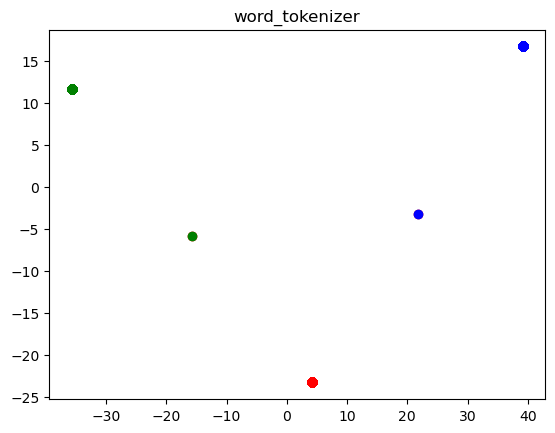

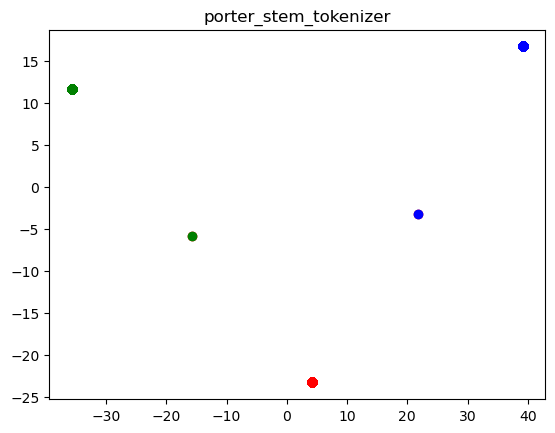

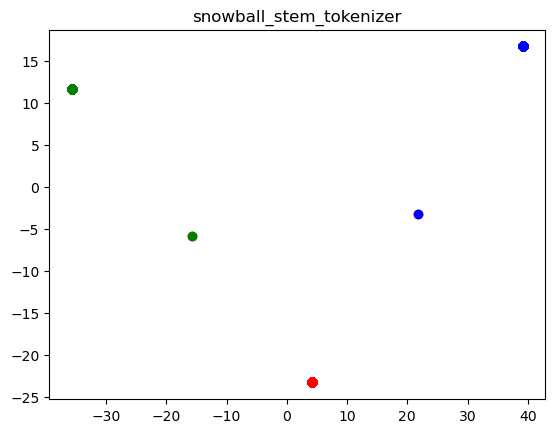

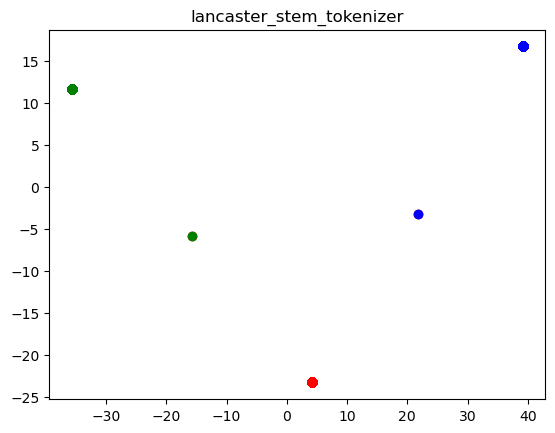

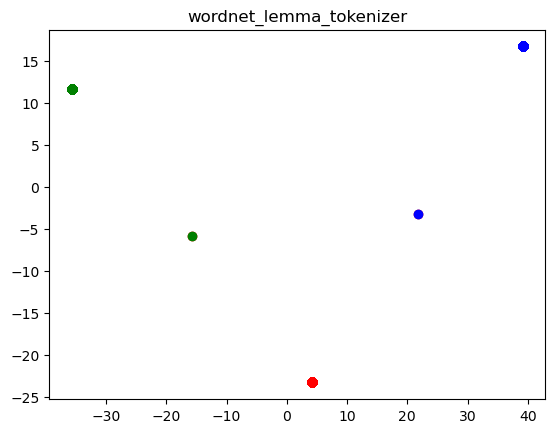

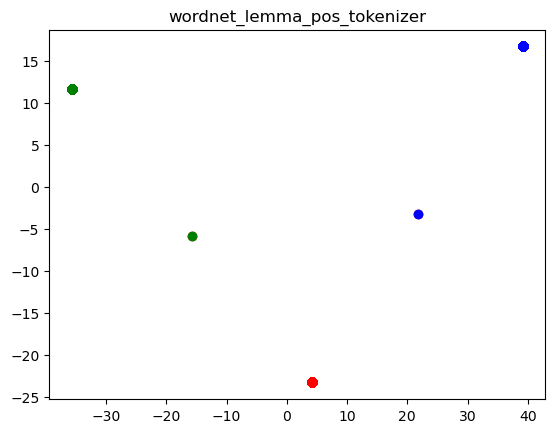

In [20]:
### Code Cell 3.2.3.1 ###

contents_X_lda = dict()

for tokenizer_name, tfidf in contents_X.items():
    X = tfidf
    y = targets

    lda = LDA(n_components=2)
    X = lda.fit_transform(X, y)

    contents_X_lda[tokenizer_name] = X

    colors = {
        'sport': 'red',
        'business': 'green',
        'technology': 'blue'
    }
    for X, y in zip(X, y):
        plt.scatter(X[0], X[1], color=colors[y])
    plt.title(tokenizer_name)
    plt.show()


3.2.3.2 ทำการลดมิติข้อมูลหัวข้อต่อกับเนื้อความของบทความ (contents_with_title_X) ด้วย LDA (Linear Discriminant Analysis) ตามเซลล์โค้ดที่ 3.2.3.2

In [ ]:
### Code Cell 3.2.3.2 ###

contents_with_title_X_lda = dict()

for tokenizer_name, tfidf in contents_with_title_X.items():
    X = tfidf
    y = targets

    lda = LDA(n_components=2)
    X = lda.fit_transform(X, y)

    contents_with_title_X_lda[tokenizer_name] = X

    colors = {
        'sport': 'red',
        'business': 'green',
        'technology': 'blue'
    }
    for X, y in zip(X, y):
        plt.scatter(X[0], X[1], color=colors[y])
    plt.title(tokenizer_name)
    plt.show()


## 3.3 Classification 1

นำข้อมูลเนื้อความของบทความ (contents_X) ที่เตรียมไว้จากข้อ 3.2.3.2 มาทำการทดลองกับโมเดล KNN, RandomForest และ LogisticRegression

3.3.1 กำหนด model และช่วงของค่า parameter ที่ต้องการทำ tuning ตามเซลล์โค้ดที่ 3.3.1

In [30]:
### Code Cell 3.3.1 ###

models = [
    {
        "model": KNeighborsClassifier(),
        "params": {'n_neighbors': list(range(1, 16))}
    },
    {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': list(range(25, 201, 25)),
            'min_samples_split': list(range(2, 21, 2)),
            'random_state': [28]
        }
    },
    {
        "model": LogisticRegression(),
        "params": {
            "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "C": list(np.arange(0.1, 1.1, 0.1))
        }
    },
]


3.3.2 ทำการ parameter tuning หา parameter ที่ให้ค่า accuracy ที่ดีที่สุดด้วย 5-fold cross validation (GridSearchCV) ของคู่ model กับข้อมูลที่ผ่านการเตรียมด้วย tokenizer แบบต่างๆ จากนั้นนำมาทดสอบกับ test set เพื่อประเมินประสิทธิภาพ model ตามเซลล์โค้ดที่ 3.3.2

In [41]:
### Code Cell 3.3.2 ###

results = {
    "model_name": [],
    "tokenizer_name": [],
    "best_tuning_parameter": [],
    "best_tuning_score": [],
    "accuracy": []
}

y = targets

for tokenizer_name, X in contents_X.items():

    # Stratified train-test split with test size of 33%
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
        random_state=50, test_size=.33, stratify=y) 

    for model in models:

        # Search for best set of parameters, using 5-fold cross validation
        clf = GridSearchCV(model['model'], model['params'], cv=5, n_jobs=-1, verbose=1)
        result = clf.fit(X_train, y_train)
        results['model_name'].append(type(model['model']).__name__)
        results['tokenizer_name'].append(tokenizer_name)
        results['best_tuning_score'].append(result.best_score_)
        results['best_tuning_parameter'].append(result.best_params_)

        # Test model with best set of parameters from GridSearchCV
        model = model['model']
        model.set_params(**result.best_params_)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results['accuracy'].append(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 fold

3.3.3 แสดงผลลัพธ์จากข้อ 3.3.2 ตามเซลล์โค้ดที่ 3.3.3

In [43]:
### Code Cell 3.3.3 ###

result_df = pd.DataFrame(results).sort_values(by=['accuracy'], ascending=False)
result_df

,model_name,tokenizer_name,best_tuning_parameter,best_tuning_score,accuracy
7,RandomForestClassifier,snowball_stem_tokenizer,"{'min_samples_split': 12, 'n_estimators': 100,...",0.970320,0.978495
2,LogisticRegression,word_tokenizer,"{'C': 0.4, 'solver': 'newton-cg'}",0.979855,0.976344
15,KNeighborsClassifier,wordnet_lemma_pos_tokenizer,{'n_neighbors': 15},0.969239,0.974194
4,RandomForestClassifier,porter_stem_tokenizer,"{'min_samples_split': 14, 'n_estimators': 75, ...",0.973500,0.974194
5,LogisticRegression,porter_stem_tokenizer,"{'C': 0.5, 'solver': 'newton-cg'}",0.981977,0.974194
10,RandomForestClassifier,lancaster_stem_tokenizer,"{'min_samples_split': 4, 'n_estimators': 100, ...",0.976686,0.974194
17,LogisticRegression,wordnet_lemma_pos_tokenizer,"{'C': 0.8, 'solver': 'newton-cg'}",0.981971,0.972043
11,LogisticRegression,lancaster_stem_tokenizer,"{'C': 0.6, 'solver': 'newton-cg'}",0.979855,0.972043
14,LogisticRegression,wordnet_lemma_tokenizer,"{'C': 0.6, 'solver': 'newton-cg'}",0.979849,0.972043
8,LogisticRegression,snowball_stem_tokenizer,"{'C': 0.8, 'solver': 'newton-cg'}",0.983035,0.972043


## 3.4 Classification 2

นำข้อมูลหัวข้อต่อกับเนื้อความของบทความ (contents_with_title_X) ที่เตรียมไว้จากข้อ 3.2.3.3 มาทำการทดลองกับโมเดล KNN, RandomForest และ LogisticRegression

3.4.1 กำหนด model และช่วงของค่า parameter ที่ต้องการทำ tuning ตามเซลล์โค้ดที่ 3.4.1

In [ ]:
### Code Cell 3.4.1 ###

models = [
    {
        "model": KNeighborsClassifier(),
        "params": {'n_neighbors': list(range(1, 16))}
    },
    {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': list(range(25, 201, 25)),
            'min_samples_split': list(range(2, 21, 2)),
            'random_state': [28]
        }
    },
    {
        "model": LogisticRegression(),
        "params": {
            "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "C": list(np.arange(0.1, 1.1, 0.1))
        }
    },
]


3.4.2 ทำการ parameter tuning หา parameter ที่ให้ค่า accuracy ที่ดีที่สุดด้วย 5-fold cross validation (GridSearchCV) ของคู่ model กับข้อมูลที่ผ่านการเตรียมด้วย tokenizer แบบต่างๆ จากนั้นนำมาทดสอบกับ test set เพื่อประเมินประสิทธิภาพ model ตามเซลล์โค้ดที่ 3.4.2

In [44]:
### Code Cell 3.4.2 ###

results = {
    "model_name": [],
    "tokenizer_name": [],
    "best_tuning_parameter": [],
    "best_tuning_score": [],
    "accuracy": []
}

y = targets

for tokenizer_name, X  in contents_with_title_X.items():
    
    # Stratified train-test split with test size of 33%
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
        random_state=50, test_size=.33, stratify=y) 

    for model in models:

        # Search for best set of parameters, using 5-fold cross validation
        clf = GridSearchCV(model['model'], model['params'], cv=5, n_jobs=-1, verbose=1)
        result = clf.fit(X_train, y_train)
        results['model_name'].append(type(model['model']).__name__)
        results['tokenizer_name'].append(tokenizer_name)
        results['best_tuning_score'].append(result.best_score_)
        results['best_tuning_parameter'].append(result.best_params_)

        # Test model with best set of parameters from GridSearchCV
        model = model['model']
        model.set_params(**result.best_params_)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results['accuracy'].append(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 fold

3.4.3 แสดงผลลัพธ์จากข้อ 3.3.2 ตามเซลล์โค้ดที่ 3.4.3

In [46]:
### Code Cell 3.4.3 ###

result_df = pd.DataFrame(results).sort_values(by=['accuracy'], ascending=False)
result_df

,model_name,tokenizer_name,best_tuning_parameter,best_tuning_score,accuracy
16,RandomForestClassifier,wordnet_lemma_pos_tokenizer,"{'min_samples_split': 2, 'n_estimators': 100, ...",0.973489,0.976344
11,LogisticRegression,lancaster_stem_tokenizer,"{'C': 0.9, 'solver': 'newton-cg'}",0.980913,0.976344
2,LogisticRegression,word_tokenizer,"{'C': 0.5, 'solver': 'newton-cg'}",0.978791,0.974194
5,LogisticRegression,porter_stem_tokenizer,"{'C': 0.8, 'solver': 'newton-cg'}",0.983029,0.974194
10,RandomForestClassifier,lancaster_stem_tokenizer,"{'min_samples_split': 20, 'n_estimators': 100,...",0.972447,0.974194
17,LogisticRegression,wordnet_lemma_pos_tokenizer,"{'C': 0.8, 'solver': 'newton-cg'}",0.983029,0.972043
14,LogisticRegression,wordnet_lemma_tokenizer,"{'C': 1.0, 'solver': 'newton-cg'}",0.981966,0.972043
8,LogisticRegression,snowball_stem_tokenizer,"{'C': 0.8, 'solver': 'newton-cg'}",0.983029,0.972043
13,RandomForestClassifier,wordnet_lemma_tokenizer,"{'min_samples_split': 18, 'n_estimators': 175,...",0.973489,0.972043
7,RandomForestClassifier,snowball_stem_tokenizer,"{'min_samples_split': 18, 'n_estimators': 75, ...",0.972436,0.969892
